In [3]:
# Task A1
# compute numerical integration with trapezium rule
import numpy as np
import matplotlib.pyplot as pl

# function trapzeqd: compute numerical integration with trapezium rule with equidistant nodes
def trapzeqd(x,y):
    # get the interval h: distance between any two consecutives nodes
    h = x[1] - x[0]
    # get the number of intervals
    N = len(x) - 1  # obviously x and y must have same length
    
    # compute the integral
    
    # compute the sum for the intermediate points
    S = 0
    for n in range(1,N):
        S += y[n]  # add the current calue of y

    # an alternative approach, with slicing and the function np.sum(), the integral can be computed within one line
    I = h * (y[0]/2 + np.sum(y[1:-1]) + y[-1]/2 )
    
    return I


# define the function f 
def f(x):
    y = 1/np.sqrt(x**20.10+2020)
    #y = np.sin(x)
    return y


# main
# lower boundary
a = 0
# upper boundary
b = 1.75
# number of equidistant intervals
N = 5

# generates the nodes
x = np.linspace(a,b,N+1) # remember, with linespace we have to provide the number of nodes and not intervals
# compute points for f(x) at nodes x
y = f(x)

# compute the integral by invoking the function trapzeqd
I = trapzeqd(x,y)
print(I)


0.034390153187415375


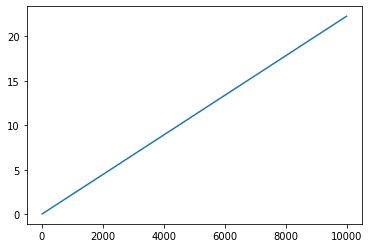

In [4]:
# Task A2
b = [10,100,1000,10000]
I = [] # generate an empty list where to store the results of I, for the various b
for up in b:
    # recompute the x interval
    x = np.linspace(a,up,N+1)
    # recompute y for these new nodes
    y = f(x)
    # compute the integral and append the resukt to the list I
    I += [trapzeqd(x,y)]

# plot I vs b
pl.plot(b,I)
    
    

0.03509359792370052


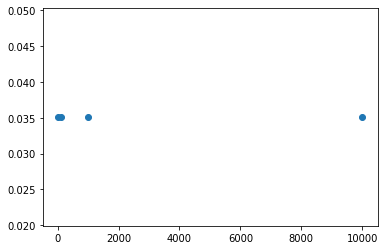

In [5]:
# Task A3
b = [10,100,1000,10000]
dx = 0.5
I = [] # generate an empty list where to store the results of I, for the various b
for up in b:
    # recompute the x interval. This time we use arange as we know the interval rather than the number of intervals
    x = np.arange(a,up+dx,dx)
    # recompute y for these new nodes
    y = f(x)
    # compute the integral and append the resukt to the list I
    I += [trapzeqd(x,y)]

# plot I vs b
pl.scatter(b,I)
print(I[3])

In [6]:
# Task B
# run the same codes for Tasks A2 and A3, but change f

# now the integral diverges as b --> infinity  (even when we use a small dx)

In [7]:
# Task C
# function trapz: compute numerical integration with trapezium rule, for nodes at any distance
def trapz(x,y):
    # get the number of subintervals
    N = len(x) - 1
    # compute the integral
    # set range for the trapezia: there are as many trapezia as the number of intervals
    R = range(0,N)
    S = 0
    for i in R:
        # compute the area of this single trapezium (remind yourself the area of a trapezium)
        S += 0.5 * (y[i+1] + y[i]) * (x[i+1] - x[i])
    return S

# test with one of the previous functions
I = trapz(x,y)
print(I)

0.03509359792370051


12.125701354602992


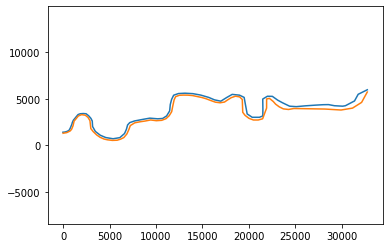

In [24]:
# Task D
import matplotlib.pyplot as pl
# read in the coordinates for the north bank
f = open('xn.txt','r')
xnt = f.readlines()
f.close()
f = open('yn.txt','r')
ynt = f.readlines()
f.close()
# put these coordinates into two separate lists. Remember to convert into numbers, as data are read as strings from files
xn = []; yn = []
for i in range(0,len(xnt)):
    xn += [float(xnt[i])] 
    yn += [float(ynt[i])]
# read in the coordinates for the south bank         
f = open('xs.txt','r')
xst = f.readlines()
f.close()
f = open('ys.txt','r')
yst = f.readlines()
f.close()
xs = []; ys = []
for i in range(0,len(xst)):
    xs += [float(xst[i])] 
    ys += [float(yst[i])]

# plot the two banks
pl.plot(xn,yn,xs,ys)
pl.axis('equal')

# ompute the surface of the river, and convert in Km^2
Area = trapz(xn,yn) - trapz(xs,ys)
print(Area*1.0e-6)


In [8]:
# Task E (optional)
import numpy as np

R = 5 # set radius of the domain

# set the step intervals in x and y
dx = 0.05
dy = 0.05

# set the x range, not including the boundaries
x = np.arange(-R+dx,R,dx)
N = len(x)
# the y range depends of the various values of x, and cannot be fixed here

# integrate in dy, for all the value of x, i.e. find G(x)

G = np.zeros(N)
# for every x
for i in range(0,N):
    # determine the boundaries m and p for this x
    mx = np.sqrt(R**2-x[i]**2)
    px = mx
    # set the y points for this x, not including the boundaries
    y = np.arange(-mx+dy,px,dy)
    z = np.zeros(len(y))
    # determine the values of the function z(x,y)
    for j in range(0,len(y)):
        z[j] = np.sqrt(R-np.sqrt(x[i]**2+y[j]**2)) # dome of Samarkand
        # z[j] = np.sqrt(R**2-x[i]**2-y[j]**2) # emisphere
    
    # integrate in dy from cx to dx (for this specific x)
    G[i] = trapzeqd(y,z) # G(x)

# integrate G(x) in dx
I = trapzeqd(x,G)

print(I)

# for an emisphere the volume is:
#print(4/3*np.pi*R**3/2)



93.54654048065754


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Z contains NaN values. This may result in rendering artifacts.


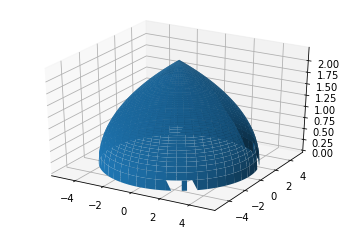

In [9]:
import matplotlib.pyplot as pl
from mpl_toolkits import mplot3d

# plot the dome

# set domain in polar coordinates
r = np.linspace(0,R,100)
t = np.linspace(0,2*np.pi,100)
# set 2D mesh grids
[Rg, Tg] = np.meshgrid(r,t)

# calculate X and Y (2D meshgrids)
X = Rg*np.cos(Tg)
Y = Rg*np.sin(Tg)

# calculate Z(X,Y)
Z = np.sqrt(R-np.sqrt(X**2+Y**2))

# plost as surface
ax = pl.axes(projection='3d')
ax.plot_surface(X,Y,Z)